In [1]:
# Exploratory Data Analysis of census data using Python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Importing csv file with declaring null values 
import os 
os.listdir('/kaggle/input')

['census-data']

In [3]:
census = pd.read_csv('../input/census-data/censusData.csv',sep =',\s', na_values = ['?'])


In [4]:
# replacing null values 
census.replace(["?"], np.nan, inplace = True)

In [5]:
census.isnull().sum()

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss    583
hours-per-week,native-country,income                                                                                        0
dtype: int64

In [6]:
census.shape


(32561, 2)

In [7]:
DataLabels =["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation", "relationship", "race", "sex", "capital-gain",
               "capital-loss", "hours-per-week", "native-country", "class"] 

census = pd.read_csv('../input/census-data/censusData.csv', header=None, names=DataLabels, sep=',\s', na_values=["?"])

In [8]:
census.shape

(32562, 15)

In [9]:
census = census[1:]

In [10]:
census['education-num'].value_counts()

9.0     10501
10.0     7291
13.0     5355
14.0     1723
11.0     1382
7.0      1175
12.0     1067
6.0       933
4.0       646
15.0      576
5.0       514
8.0       433
16.0      413
3.0       333
2.0       168
1.0        51
Name: education-num, dtype: int64

In [11]:
census['age']= pd.to_numeric(census['age'])

In [12]:
census['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [13]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [14]:
# changing some of the datatypes 
census['hours-per-week'] = census['hours-per-week'].astype(np.int64)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# seperating categorical and numerical columns 
all_columns = list(census.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(census.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(census.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
Categorical columns:
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
Numerical columns:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [17]:
len(categorical_columns)

9

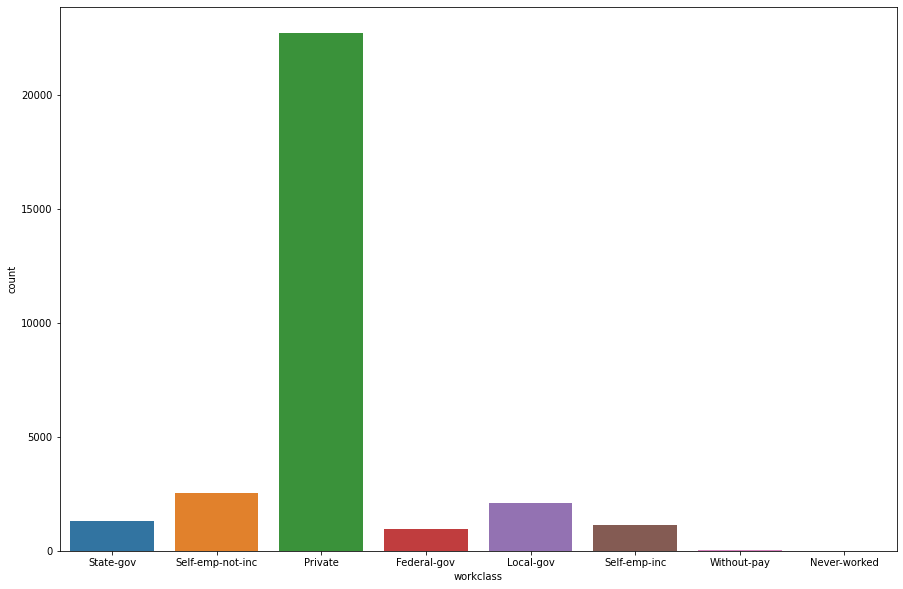

In [18]:
plt.figure(figsize = (15,10))
sns.countplot(census['workclass'])
plt.show()

In [19]:
from scipy.stats import kurtosis
from scipy.stats import skew


In [20]:
kurt_hrs = kurtosis(census['hours-per-week'])
skew_hrs = skew(census['hours-per-week'])

In [21]:
print(kurt_hrs)
print (skew_hrs)

2.9160546709844883
0.227632049774777


In [22]:
census['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [23]:
census['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
3,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
4,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
5,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
6,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K
7,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45,United-States,>50K
9,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50,United-States,>50K
10,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40,United-States,>50K


In [25]:
census['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

<AxesSubplot:>

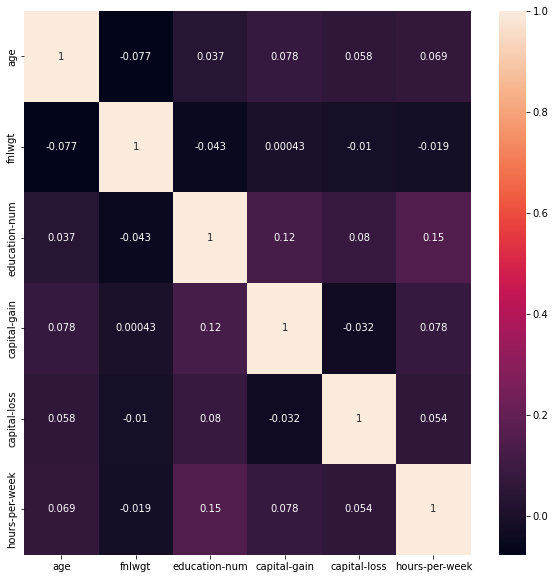

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(census.corr(),annot=True)

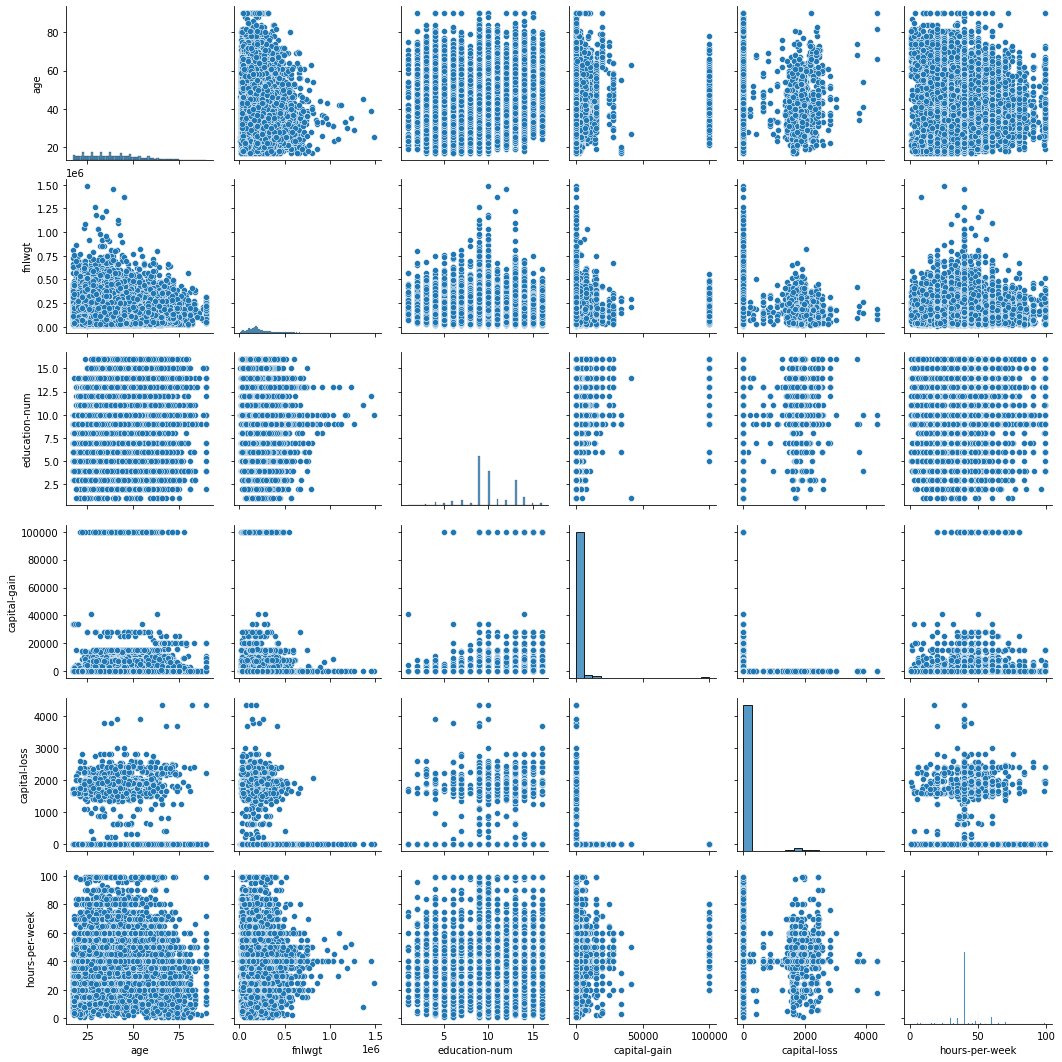

In [27]:
sns.pairplot(census)

<AxesSubplot:xlabel='count', ylabel='workclass'>

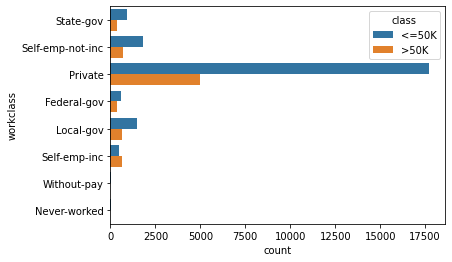

In [28]:
sns.countplot(y = census['workclass'], hue = census['class'])

<AxesSubplot:xlabel='sex', ylabel='count'>

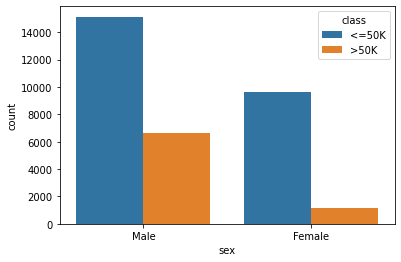

In [29]:
sns.countplot(census['sex'], hue = census['class'])

<AxesSubplot:xlabel='race', ylabel='count'>

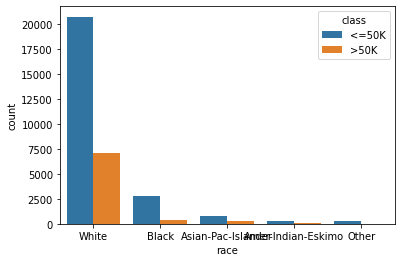

In [30]:
sns.countplot(x = census['race'], hue = census['class'])

<AxesSubplot:xlabel='count', ylabel='education'>

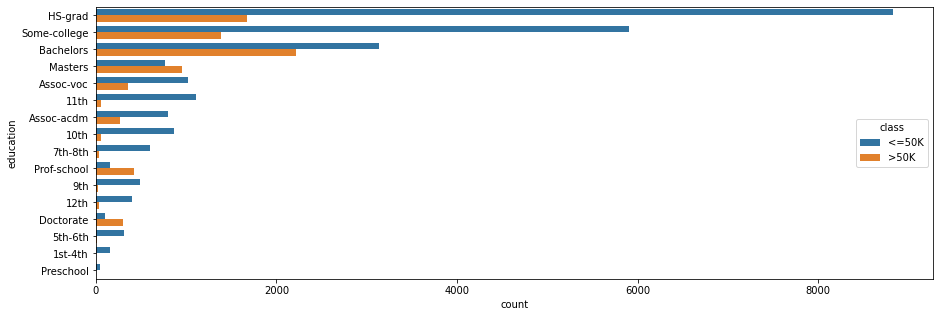

In [31]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y = census['education'], hue = census['class'], order = census['education'].value_counts().index)

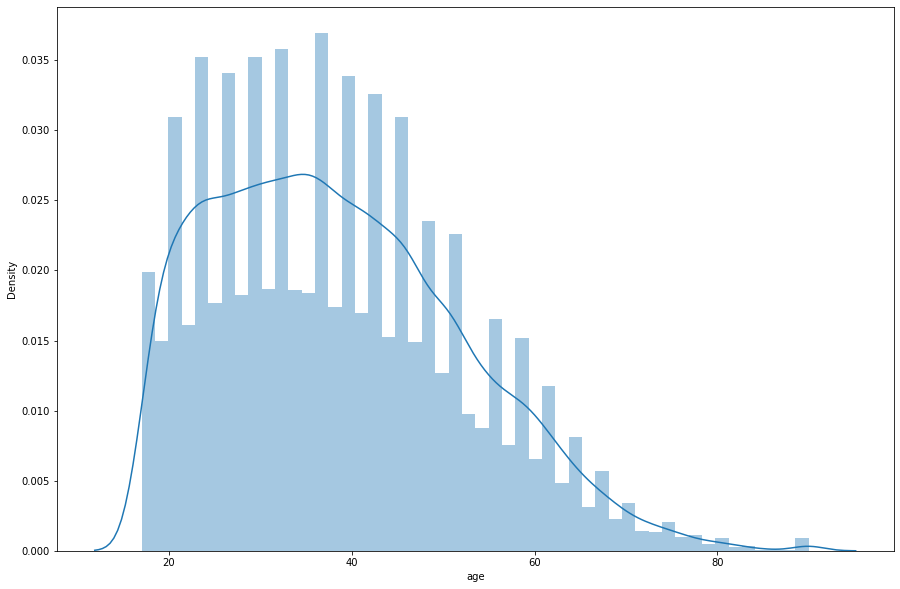

In [32]:
plt.figure(figsize=(15,10))
sns.distplot(census['age'])
plt.show()

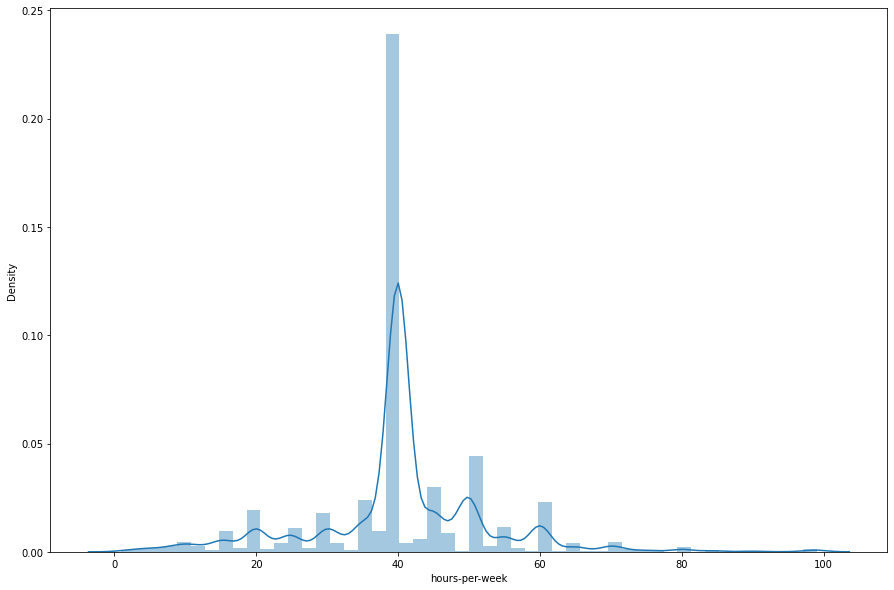

In [33]:
plt.figure(figsize=(15,10))
sns.distplot(census['hours-per-week'])
plt.show()

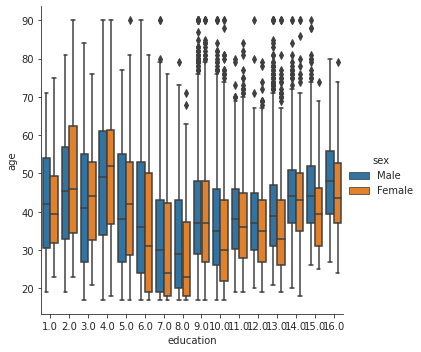

In [34]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("education-num", "age", "sex", data= census, kind="box") 
    g.set_axis_labels("education", "age")

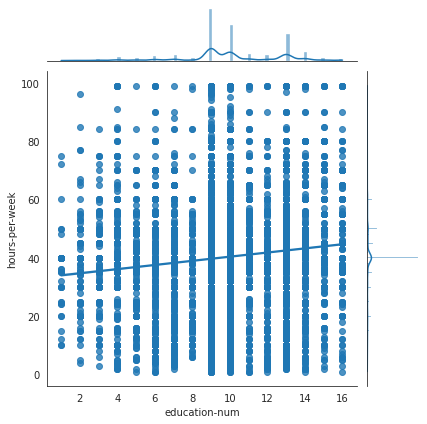

In [35]:
with sns.axes_style('white'):
    sns.jointplot("education-num", "hours-per-week", data=census, kind='reg')